<a href="https://colab.research.google.com/github/dqminhv/Capstone_Project_2/blob/Fake_Job_Postings/Fake_Job_Postings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. **Data Preprocessing:**
   - Remove any irrelevant or redundant columns that do not contribute to the classification task.
   - Handle missing values, either by imputing them or removing rows/columns with missing data.
   - Convert textual data (job descriptions, requirements, etc.) into numerical representations (e.g., using word embeddings or TF-IDF).
   - Split the data into training and testing sets.

2. **Feature Engineering:**
   - Extract relevant features from the text data that may help the model distinguish between fake and real job postings.
   - Consider features such as word frequencies, sentence lengths, or any other domain-specific features that might be informative.

3. **Selecting a Model:**
   - Choose an appropriate machine learning algorithm for binary classification, such as Logistic Regression, Random Forest, Gradient Boosting, or Support Vector Machine (SVM).
   - Experiment with different algorithms to see which one performs best on your dataset.

4. **Training the Model:**
   - Train the selected model on the training dataset.
   - Use techniques like cross-validation to tune hyperparameters and avoid overfitting.

5. **Model Evaluation:**
   - Evaluate the model's performance on the testing dataset using metrics like accuracy, precision, recall, F1 score, and confusion matrix.
   - Consider the business requirements and implications of false positives and false negatives to choose the appropriate evaluation metric.

6. **Handling Class Imbalance (if present):**
   - Check if there is a significant class imbalance (i.e., a lot more real job postings than fake ones or vice versa).
   - If there is a class imbalance, consider techniques like oversampling, undersampling, or using synthetic data to balance the classes.

7. **Model Fine-Tuning:**
   - Depending on the results of the initial evaluation, make adjustments to the model or try different feature engineering approaches to improve performance.

8. **Model Deployment:**
   - Once you have a satisfactory model, deploy it in a production environment to make predictions on new job postings.

9. **Monitoring and Maintenance:**
   - Continuously monitor the model's performance in the production environment and retrain the model periodically on new data to ensure it stays up-to-date and accurate.

In [112]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [113]:
import warnings

# Ignore all warnings (not recommended in general)
warnings.filterwarnings("ignore")

In [114]:
#import required packages
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image
import pydotplus
import missingno as msno
from ydata_profiling import ProfileReport


**1. Load Data**

In [115]:
#Load csv file to a pandas DataFrame
job_postings_data = pd.read_csv('https://raw.githubusercontent.com/dqminhv/Capstone_Project_2/Fake_Job_Postings/Data/fake_job_postings.csv')

In [116]:
#Let look at the first few row of th data frame
job_postings_data.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [117]:
#Delete the job_id column since it has no use
job_postings_data.drop('job_id', axis=1, inplace=True)

Use ydata-profiling to take a look at the data set.

In [118]:
profile = ProfileReport(job_postings_data, title="Pandas Profiling Report")

In [119]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [120]:
#Let look at the data type of each column and see if how many missing values there are
job_postings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

<Axes: >

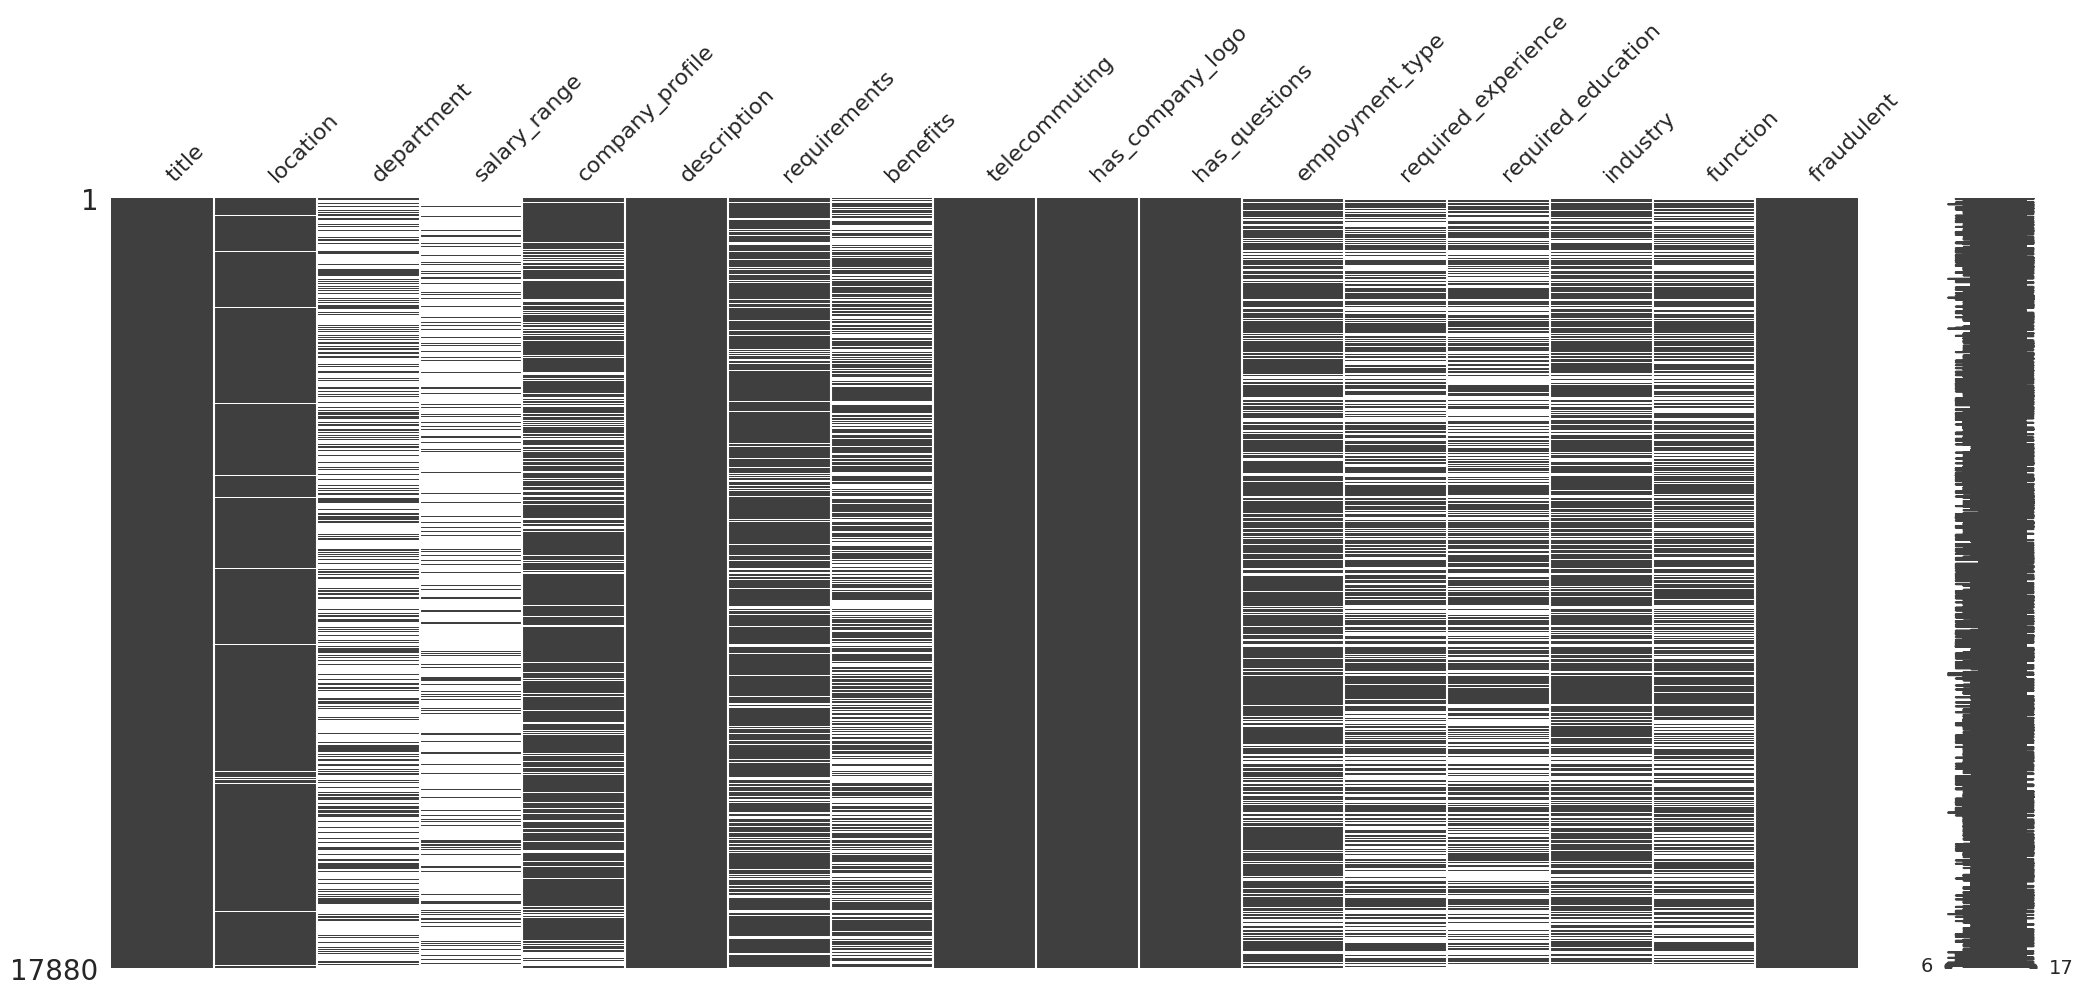

In [121]:
#Let plot a missing values matrix
msno.matrix(job_postings_data)

It seems that there are many variables with high missing-value rates. We should consider how to deal with these missing-value variables. We should not simply drop these variables since the missing value could be a good indicator that a job posting is fake. We can make some plots to see that how the missing values correlate with fake job posting for each variable that has missing values.

In [122]:
missing_value_var = job_postings_data.columns.drop(['title', 'description', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent' ])

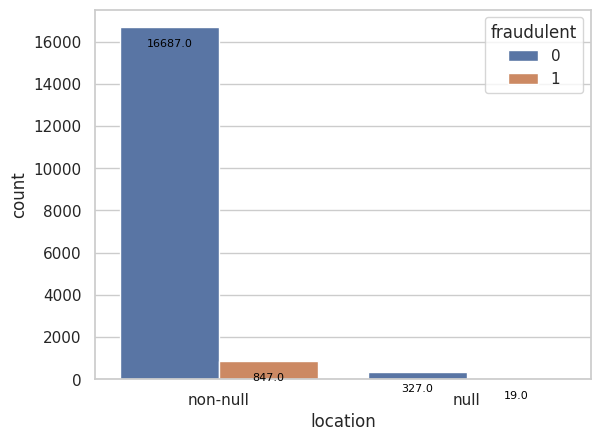

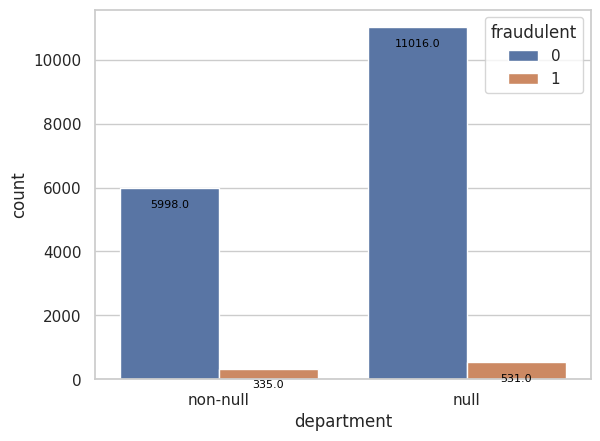

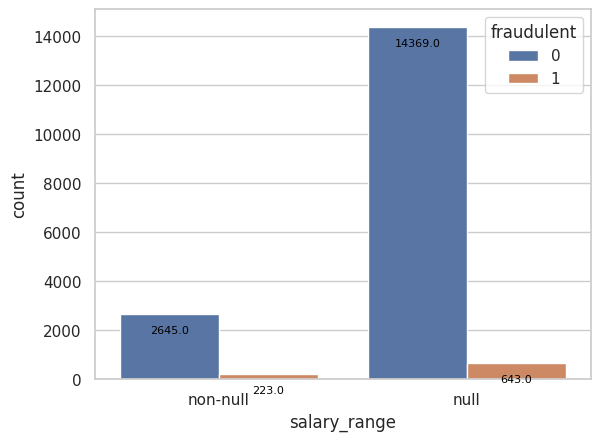

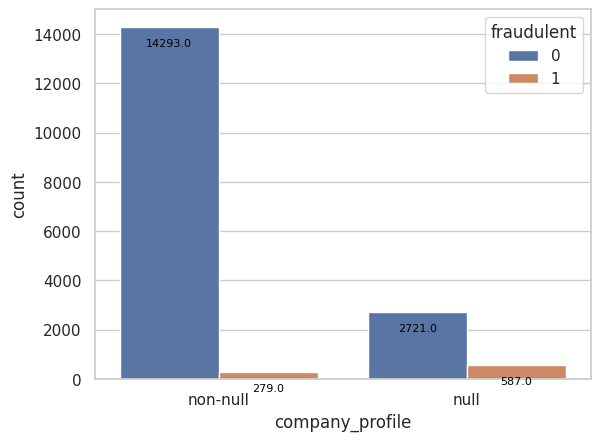

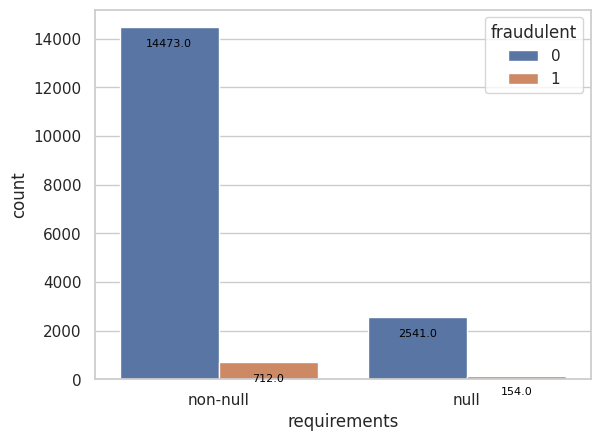

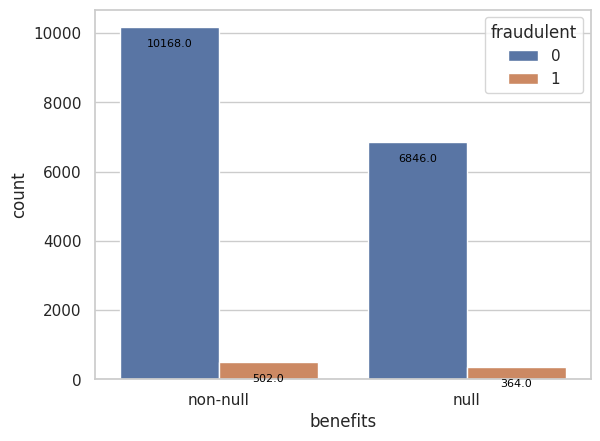

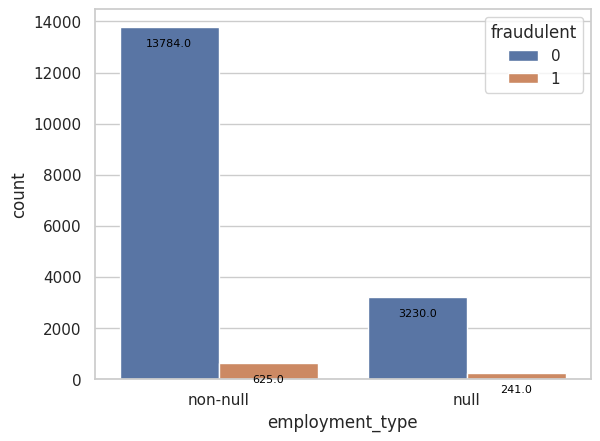

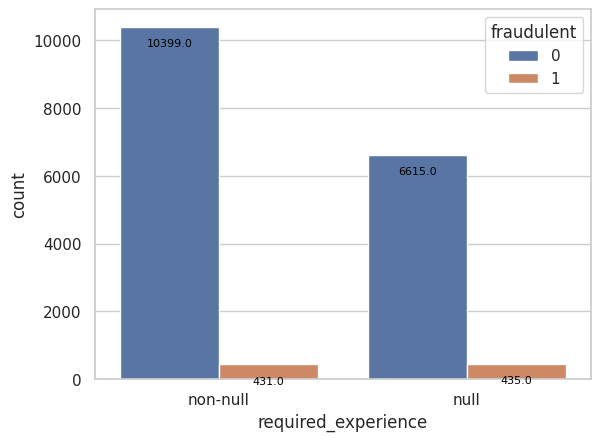

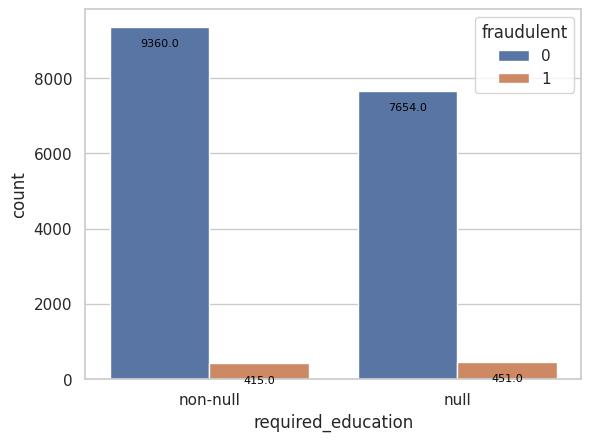

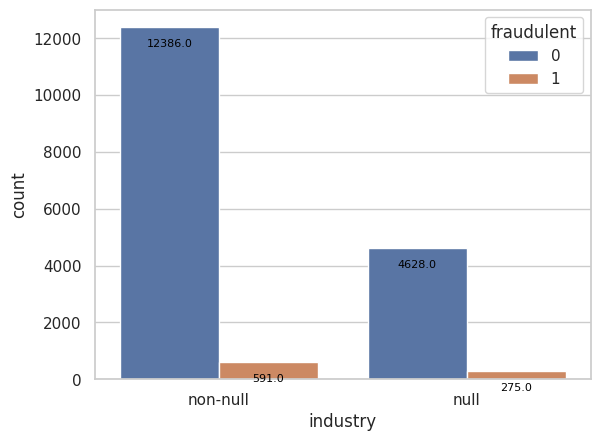

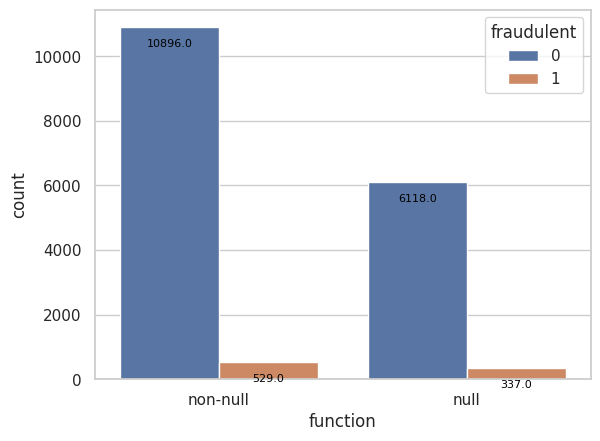

In [123]:
for var in missing_value_var:
  df = job_postings_data[[var, 'fraudulent']]
  df.loc[~df[var].isnull(), var] = 'non-null'
  df[var].fillna('null', inplace=True)
  _ = sns.countplot(x=var, data=df ,hue="fraudulent", order=['non-null', 'null'])
  for p in _.patches:
    _.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
  plt.show()

From the plots above, it is difficult to conclude whether missing value is a sign of fraudulent job postings. We will keep those missing values and impute them with appropriate values. We see that all integer variables, 'telecommuting', 'has_company_logo', 'has_questions', and the predict varible, 'fraudulent', do not contain missing values. Thus, we will impute missing values for other variable with 'non-specified'.

In [124]:
job_postings_data.fillna('Not Specified', inplace=True)
#job_postings_data = job_postings_data.replace(['Not Applicable','Unspecified'],'Not Specified')

In [125]:
#Let check if there is any missing values
job_postings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   department           17880 non-null  object
 3   salary_range         17880 non-null  object
 4   company_profile      17880 non-null  object
 5   description          17880 non-null  object
 6   requirements         17880 non-null  object
 7   benefits             17880 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      17880 non-null  object
 12  required_experience  17880 non-null  object
 13  required_education   17880 non-null  object
 14  industry             17880 non-null  object
 15  function             17880 non-null  object
 16  frau

In [130]:
#Let explore unique values for each variable. We should drop 'company_profile',	'description',	'requirements',	'benefits' variables because these variables will most likely have a distinct value for each record.
for col in job_postings_data.drop(['company_profile',	'description',	'requirements',	'benefits'], axis=1).columns:
  print(job_postings_data.value_counts(col).sort_index())
  print('\n')
  print('***************************')

title
   Electrician                                                       1
   Environmental Technician I                                        1
   Piping Material Engineer                                          1
  Discipline Manager Civil, Structural, Marine, Architectural        1
  FEA Senior engineer                                                1
                                                                    ..
warehouse opperative                                                 1
web designer                                                         1
web project manager                                                  1
work from home                                                       1
~ LM Structures - Expression of Interest for Future Consideration    1
Length: 11231, dtype: int64


***************************
location
AE, ,                       6
AE, , Abudhabi              1
AE, , Dubai                 6
AE, , Media City | Dubai    3
AE, AZ,                   

For this project, we are focusing on job postings within the United States. Thus, we will drop